<a href="https://colab.research.google.com/github/rsotop/Anal-tica-de-negocio/blob/main/Train%26Apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
filename = list(uploaded.keys())[0]

import pandas as pd
import io

df_group = pd.read_csv(filename)
df_group

,fecha,hora,minutos,rango_30_min,semestre,trimestre,mes,dia,semana_mes,dia_semana,Mesas_Ocupadas
0,2023-01-01,0,0,00:00 - 00:29,1,1,1,1,1,7,0
1,2023-01-01,0,1,00:00 - 00:29,1,1,1,1,1,7,0
2,2023-01-01,0,2,00:00 - 00:29,1,1,1,1,1,7,0
3,2023-01-01,0,3,00:00 - 00:29,1,1,1,1,1,7,0
4,2023-01-01,0,4,00:00 - 00:29,1,1,1,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...
928795,2024-10-06,23,55,23:30 - 23:59,2,4,10,6,1,7,4
928796,2024-10-06,23,56,23:30 - 23:59,2,4,10,6,1,7,4
928797,2024-10-06,23,57,23:30 - 23:59,2,4,10,6,1,7,4
928798,2024-10-06,23,58,23:30 - 23:59,2,4,10,6,1,7,4


# Entrenar Modelo

In [ ]:
#Listar nombre de columnas como un arreglo
column_names = df_group.columns.tolist()
print(column_names)

['fecha', 'hora', 'minutos', 'rango_30_min', 'semestre', 'trimestre', 'mes', 'dia', 'semana_mes', 'dia_semana', 'Mesas_Ocupadas']


In [ ]:
df_train = df_group[
                    (df_group['fecha'] >= '2024-05-01')
                    &
                    (df_group['fecha'] <= '2024-09-22')
                    ]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn.metrics import mean_squared_error
!pip install category_encoders
import category_encoders as ce
import matplotlib.pyplot as plt

In [ ]:
# Variables iniciales
columnas = ['hora', 'minutos', 'rango_30_min', 'dia', 'semana_mes', 'dia_semana']  # Aquí debes definir las columnas categóricas que vas a codificar

X = df_train[columnas]
y = df_train['Mesas_Ocupadas']

# Separar datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Codificar variables categóricas
target_encoder = ce.TargetEncoder(cols=columnas, smoothing=10)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Crear y ajustar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)
rf_model.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=123)

Importancia de los predictores en el modelo
      predictor  importancia
2  rango_30_min     0.572036
5    dia_semana     0.179945
3           dia     0.104675
0          hora     0.099886
4    semana_mes     0.027402
1       minutos     0.016056


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El error (rmse) de test es: 1.3034827482188687


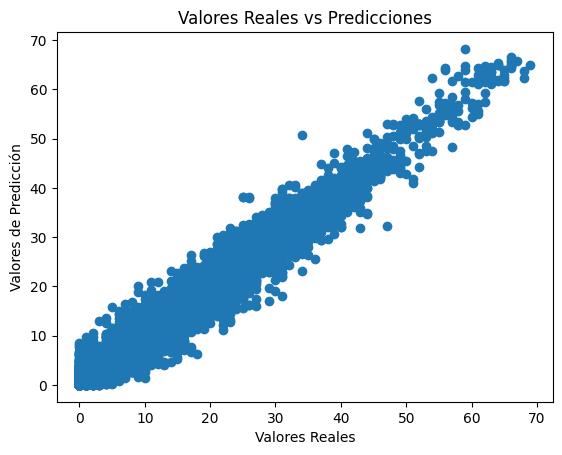

,Real,Predicción
847018,0,0.0
704820,0,0.0
700578,0,0.0
707335,0,0.0
848774,0,0.0
...,...,...
703601,0,0.0
821431,0,0.0
835854,0,0.0
822255,0,0.0


In [ ]:
# Importancia de los predictores
importancia_predictores = pd.DataFrame({'predictor': X_train_encoded.columns, 'importancia': rf_model.feature_importances_})
print("Importancia de los predictores en el modelo")
print(importancia_predictores.sort_values('importancia', ascending=False))

# Evaluar el modelo en el conjunto de prueba
predicciones = rf_model.predict(X_test_encoded)
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
print(f"El error (rmse) de test es: {rmse}")

# Crear un DataFrame con los valores reales y las predicciones
resultados = pd.DataFrame({'Real': y_test, 'Predicción': predicciones})
#print(resultados)

# Gráfico de dispersión
plt.scatter(resultados['Real'], resultados['Predicción'])
plt.xlabel('Valores Reales')
plt.ylabel('Valores de Predicción')
plt.title('Valores Reales vs Predicciones')
plt.show()
resultados

# Aplicar Modelo

## Crear nuevo DataFrame para aplicar modelo

In [ ]:
# Obtener la fecha más reciente en df_train
df_train['fecha'] = pd.to_datetime(df_train['fecha'])
fecha_max = df_train['fecha'].max() + pd.DateOffset(days=1)
fecha_max

<ipython-input-73-20b003a61662>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['fecha'] = pd.to_datetime(df_train['fecha'])


Timestamp('2024-09-23 00:00:00')

In [ ]:
df_fechas = pd.DataFrame({'fecha': pd.date_range(start=fecha_max, periods=7, freq='D')})
df_horas = pd.DataFrame({'hora': pd.date_range(start='00:00', end='23:59', freq='T').time})
df_fechaHora = df_fechas.assign(key=1).merge(df_horas.assign(key=1), on='key').drop('key', axis=1)
df_fechaHora

<ipython-input-74-692e65b55fc7>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_horas = pd.DataFrame({'hora': pd.date_range(start='00:00', end='23:59', freq='T').time})


,fecha,hora
0,2024-09-23,00:00:00
1,2024-09-23,00:01:00
2,2024-09-23,00:02:00
3,2024-09-23,00:03:00
4,2024-09-23,00:04:00
...,...,...
10075,2024-09-29,23:55:00
10076,2024-09-29,23:56:00
10077,2024-09-29,23:57:00
10078,2024-09-29,23:58:00


In [ ]:
# Crear la columna fechaHora combinando fecha y hora
df_fechaHora['fechaHora'] = pd.to_datetime(df_fechaHora['fecha'].astype(str) + ' ' + df_fechaHora['hora'].astype(str))

# Eliminar las columnas fecha y hora
df_fechaHora = df_fechaHora.drop(['fecha', 'hora'], axis=1)

df_fechaHora

,fechaHora
0,2024-09-23 00:00:00
1,2024-09-23 00:01:00
2,2024-09-23 00:02:00
3,2024-09-23 00:03:00
4,2024-09-23 00:04:00
...,...
10075,2024-09-29 23:55:00
10076,2024-09-29 23:56:00
10077,2024-09-29 23:57:00
10078,2024-09-29 23:58:00


In [ ]:
df_fechaHora['fecha'] = df_fechaHora['fechaHora'].dt.date
df_fechaHora['hora'] = df_fechaHora['fechaHora'].dt.hour
df_fechaHora['minutos'] = df_fechaHora['fechaHora'].dt.minute
df_fechaHora['rango_30_min'] = df_fechaHora.apply(lambda row: f"{row['hora']:02d}:{'00' if row['minutos'] < 30 else '30'} - {row['hora']:02d}:{'29' if row['minutos'] < 30 else '59'}", axis=1) #Para que rango_hora llegue sea cada 30 miuntos (ej: 15:00 - 15.29, 15:30 - 15:59, ...)
df_fechaHora['semestre'] = df_fechaHora['fechaHora'].dt.month.apply(lambda x: 1 if x <= 6 else 2) # Determina el semestre en función del mes
df_fechaHora['trimestre'] = df_fechaHora['fechaHora'].dt.quarter
df_fechaHora['mes'] = df_fechaHora['fechaHora'].dt.month
df_fechaHora['dia'] = df_fechaHora['fechaHora'].dt.day
df_fechaHora['semana_mes'] = (df_fechaHora['dia'] - 1) // 7 + 1
df_fechaHora['dia_semana'] = df_fechaHora['fechaHora'].dt.dayofweek + 1 # Se suma uno para semana de lunes (1) a domingo (7)
df_fechaHora = df_fechaHora.drop(['fechaHora'], axis=1)

df_fechaHora

,fecha,hora,minutos,rango_30_min,semestre,trimestre,mes,dia,semana_mes,dia_semana
0,2024-09-23,0,0,00:00 - 00:29,2,3,9,23,4,1
1,2024-09-23,0,1,00:00 - 00:29,2,3,9,23,4,1
2,2024-09-23,0,2,00:00 - 00:29,2,3,9,23,4,1
3,2024-09-23,0,3,00:00 - 00:29,2,3,9,23,4,1
4,2024-09-23,0,4,00:00 - 00:29,2,3,9,23,4,1
...,...,...,...,...,...,...,...,...,...,...
10075,2024-09-29,23,55,23:30 - 23:59,2,3,9,29,5,7
10076,2024-09-29,23,56,23:30 - 23:59,2,3,9,29,5,7
10077,2024-09-29,23,57,23:30 - 23:59,2,3,9,29,5,7
10078,2024-09-29,23,58,23:30 - 23:59,2,3,9,29,5,7


In [ ]:
df_new = df_fechaHora.copy()
df_new

,fecha,hora,minutos,rango_30_min,semestre,trimestre,mes,dia,semana_mes,dia_semana
0,2024-09-23,0,0,00:00 - 00:29,2,3,9,23,4,1
1,2024-09-23,0,1,00:00 - 00:29,2,3,9,23,4,1
2,2024-09-23,0,2,00:00 - 00:29,2,3,9,23,4,1
3,2024-09-23,0,3,00:00 - 00:29,2,3,9,23,4,1
4,2024-09-23,0,4,00:00 - 00:29,2,3,9,23,4,1
...,...,...,...,...,...,...,...,...,...,...
10075,2024-09-29,23,55,23:30 - 23:59,2,3,9,29,5,7
10076,2024-09-29,23,56,23:30 - 23:59,2,3,9,29,5,7
10077,2024-09-29,23,57,23:30 - 23:59,2,3,9,29,5,7
10078,2024-09-29,23,58,23:30 - 23:59,2,3,9,29,5,7


In [ ]:
# Aplicar el modelo a nuevos datos
df_new_encoded = target_encoder.transform(df_new[columnas])

# Aplicar el modelo a nuevos datos
predicciones_nuevas = rf_model.predict(X = df_new_encoded)

# Agregar las predicciones al dataframe
df_new_encoded_final = df_new_encoded.copy()
df_new_encoded_final['Mesas_Pred'] = predicciones_nuevas

# Concatenar los DataFrames
df_pred = pd.concat([df_new[['fecha', 'rango_30_min']], df_new_encoded_final['Mesas_Pred']], axis=1)
df_pred

,fecha,rango_30_min,Mesas_Pred
0,2024-09-23,00:00 - 00:29,20.30
1,2024-09-23,00:00 - 00:29,20.93
2,2024-09-23,00:00 - 00:29,21.00
3,2024-09-23,00:00 - 00:29,20.79
4,2024-09-23,00:00 - 00:29,19.21
...,...,...,...
10075,2024-09-29,23:30 - 23:59,24.91
10076,2024-09-29,23:30 - 23:59,26.46
10077,2024-09-29,23:30 - 23:59,24.33
10078,2024-09-29,23:30 - 23:59,24.33


In [ ]:
# Obtener fecha inicial y fecha final
fecha_ini = df_pred['fecha'].min().strftime('%Y%m%d')
fecha_fin = df_pred['fecha'].max().strftime('%Y%m%d')

# Exportar a Excel
archivo = f'df_pred_{fecha_ini}_a_{fecha_fin}_TotNoGroup.xlsx'
df_pred.to_excel(archivo, index=False)
files.download(archivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_pred_group = df_pred.groupby(['fecha', 'rango_30_min'])['Mesas_Pred'].mean().reset_index()
df_pred_group

,fecha,rango_30_min,Mesas_Pred
0,2024-09-23,00:00 - 00:29,18.863333
1,2024-09-23,00:30 - 00:59,9.230667
2,2024-09-23,01:00 - 01:29,4.601667
3,2024-09-23,01:30 - 01:59,2.354667
4,2024-09-23,02:00 - 02:29,0.130333
...,...,...,...
331,2024-09-29,21:30 - 21:59,32.393333
332,2024-09-29,22:00 - 22:29,33.178000
333,2024-09-29,22:30 - 22:59,34.695000
334,2024-09-29,23:00 - 23:29,34.867000


In [ ]:
# Obtener fecha inicial y fecha final
fecha_ini = df_pred['fecha'].min().strftime('%Y%m%d')
fecha_fin = df_pred['fecha'].max().strftime('%Y%m%d')

# Exportar a Excel
archivo = f'df_pred_{fecha_ini}_a_{fecha_fin}_TotGroup.xlsx'
df_pred_group.to_excel(archivo, index=False)
files.download(archivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convertir la columna 'fecha' a cadenas de texto con el formato deseado
df_pred['fecha'] = df_pred['fecha'].dt.strftime('%Y-%m-%d')

# Ordenar el DataFrame por rango de hora y fecha
df_pred_sorted = df_pred.sort_values(by=['rango_30_min', 'fecha'])

# Crear una tabla pivote
df_pivot = df_pred_sorted.pivot(index='rango_30_min', columns='fecha', values='Mesas_Pred')

# Restablecer el índice para que 'rango_30_min' sea una columna
df_pivot_reset = df_pivot.reset_index()

# Mostrar la matriz de predicciones
df_pivot_reset

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Obtener fecha inicial y fecha final
fecha_ini = df_pred_sorted['fecha'].min().strftime('%Y%m%d')
fecha_fin = df_pred_sorted['fecha'].max().strftime('%Y%m%d')

# Exportar a Excel
archivo = f'Proyeccion_{fecha_ini}_a_{fecha_fin}.xlsx'
df_pivot_reset.to_excel(archivo, index=False)
files.download(archivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>